# Funciones Generales

In [5]:
import numpy as np
import matplotlib.pyplot as plt

‎ 
‎ 
‎ 
‎ 
‎ 





‎ 

## Graficar los puntos

Esta función grafica los puntos $(x,y)$ proporcionados como dos listas o arrays $xs$ y $ys$.

In [103]:
def puntos(xs, ys):
    plt.scatter(xs, ys, color='blue')
    plt.xlabel("xs")
    plt.ylabel("ys")
    plt.title("Plot of xs vs ys")
    plt.grid()
    plt.show()

## Ajuste de Polinomios

Ajusta un polinomio de grado $n$ (especificado por grado) a los datos $(xs,ys)$ usando el método de mínimos cuadrados, y genera un gráfico comparando los datos originales con el ajuste.

In [106]:
def ajuste_polinomio(xs, ys, grado, tipo):
    coeficientes = np.polyfit(xs, ys, grado)
    polinomio = np.poly1d(coeficientes)
    ys_pred = polinomio(xs)
    mse = np.mean((ys - ys_pred) ** 2)

        # Crear la representación del polinomio como texto
    polinomio_texto = " + ".join(
        f"{coef:.3f}x^{grado - i}" if grado - i > 0 else f"{coef:.3f}"
        for i, coef in enumerate(coeficientes)
    )
    
    plt.scatter(xs, ys, label="Datos originales", color="blue")
    x_graf = np.linspace(min(xs), max(xs), 100)
    plt.plot(x_graf, polinomio(x_graf), label=f"Polinomio de {grado}º grado\n$ y = {polinomio_texto}$", color="red")
    plt.title(f"Ajuste {tipo} por Mínimos Cuadrados\nMSE: {mse:.6f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

## Ajuste Exponencial General

Esta función realiza un ajuste exponencial de la forma $y = b \cdot e^{{ax}}$ utilizando mínimos cuadrados. Ya que la relación es no lineal, aplicamos el logaritmo natural para linealizarla:
$$ln(y)=ln(b)+a \cdot x$$
Redefinimos:

$Y' = ln(y)$

$B = ln(b)$

Y se obtiene la ecuación lineal:
$$Y' = a \cdot x+B$$

Se debe tener en cuenta que:
$$b=e^{B}$$
para regresar a la forma original del modelo:
$$y=b \cdot e^{{ax}}$$

In [2]:
def ajuste_exponencial(xs, ys):
    log_ys = np.log(ys)
    
    coeficientes = np.polyfit(xs, log_ys, 1)
    a = coeficientes[0]
    B = coeficientes[1] 
    b = np.exp(B)  
    
    ys_pred = b * np.exp(a * xs)
    
    mse = np.mean((ys - ys_pred) ** 2)
    
    plt.scatter(xs, ys, color='blue', label='Datos originales')
    plt.plot(xs, ys_pred, color='red', label=f'Modelo ajustado: $y = {b:.3f}e^{{{a:.3f}x}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste Exponencial ($be^{{ax}}$) por Mínimos Cuadrados\nMSE: {mse:.6f}')
    plt.legend()
    plt.grid()
    plt.show()

## Ajuste Potencia

Esta función realiza un ajuste potencia de la forma $y = b \cdot x^a$ utilizando mínimos cuadrados. Ya que la relación es no lineal, aplicamos el logaritmo natural para linealizarla:
$$\ln(y) = \ln(b) + a\ln(x)$$
Redefinimos:

$Y' = \ln(y)$

$X' = \ln(x)$

$B = \ln(b)$

Y se obtiene la ecuación lineal:
$$Y' = aX' + B$$

Se debe tener en cuenta que:
$$b = e^B$$
para regresar a la forma original del modelo:
$$y = b \cdot x^a$$


In [112]:
def ajuste_potencia(xs, ys):
    log_xs = np.log(xs)
    log_ys = np.log(ys)
    
    coeficientes = np.polyfit(log_xs, log_ys, 1)
    a = coeficientes[0]
    B = coeficientes[1] 
    b = np.exp(B)  
    
    ys_pred = b * (xs ** a)
    mse = np.mean((ys - ys_pred) ** 2)
    
    plt.scatter(xs, ys, color='blue', label='Datos originales')
    plt.plot(xs, ys_pred, color='red', label=f'Modelo ajustado: $y = {b:.3f}x^{{{a:.3f}}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste Potencia ($bx^{{a}}$) por Mínimos Cuadrados\nMSE: {mse:.6f}')
    plt.legend()
    plt.grid()
    plt.show()

# Ejercicio 1

**Dados los datos:**

In [6]:
xs = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 
               5.5, 5.9, 6.3, 6.8, 7.1])
ys = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 
               195.14, 224.87, 256.73, 299.50, 326.72])

In [7]:
puntos(xs, ys)

NameError: name 'puntos' is not defined

**a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.**

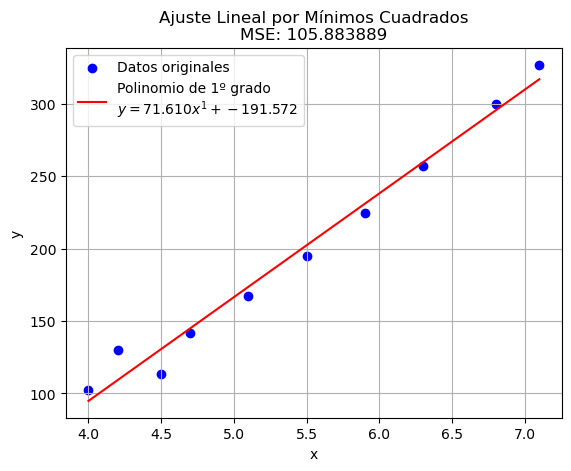

In [118]:
ajuste_polinomio(xs, ys, 1, 'Lineal')

**b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.**

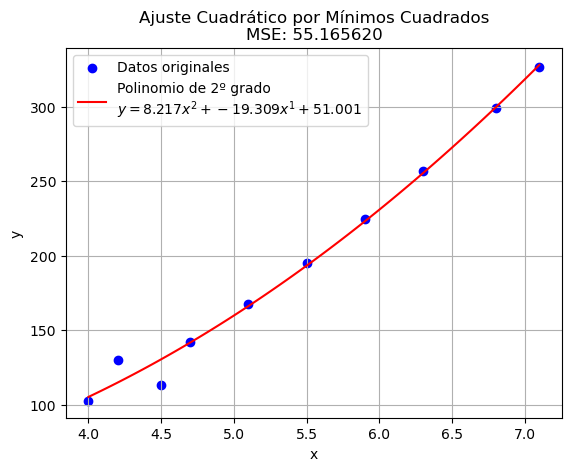

In [120]:
ajuste_polinomio(xs, ys, 2, 'Cuadrático')

**c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.** 

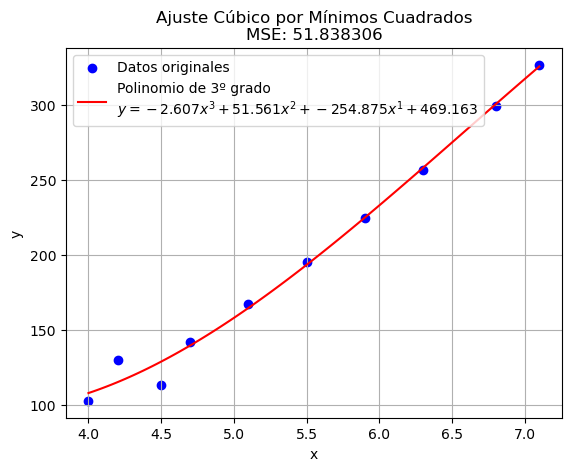

In [122]:
ajuste_polinomio(xs, ys, 3, 'Cúbico')

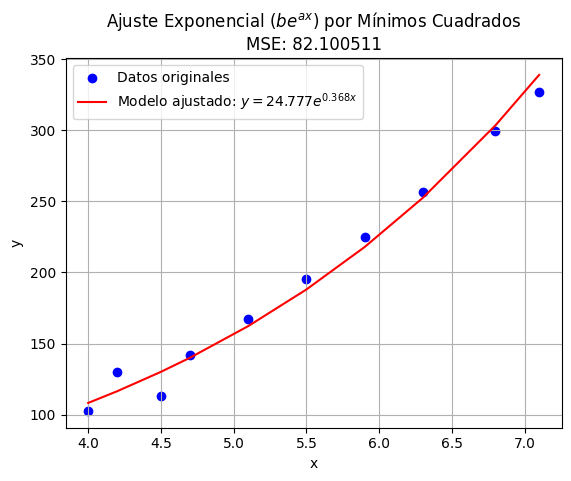

In [8]:
ajuste_exponencial(xs, ys)

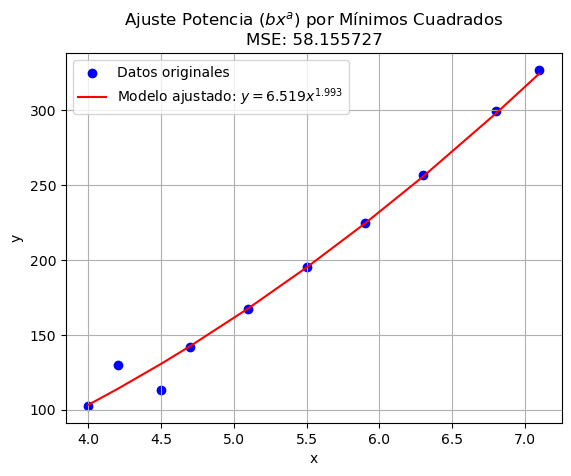

In [124]:
ajuste_potencia(xs, ys)

> Gracias al error cuadrático medio, el mejor ajuste lo da el **cúbico**.

# Ejercicio 2

In [127]:
xs2 = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
ys2 = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])

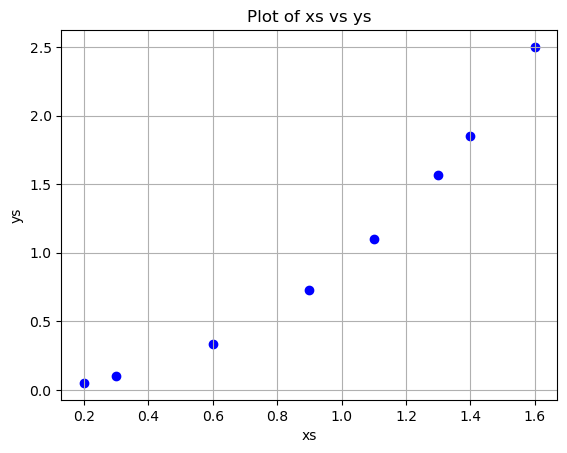

In [128]:
puntos(xs2, ys2)

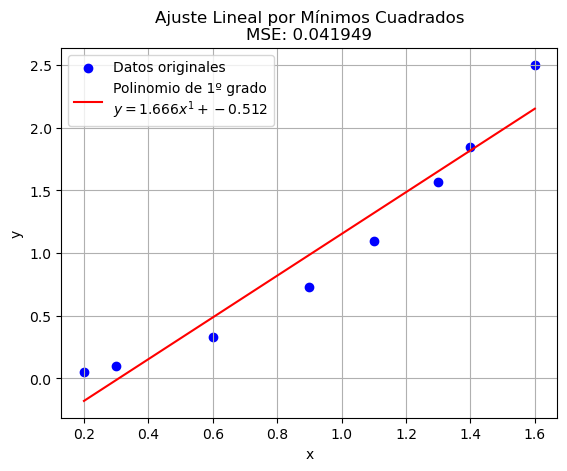

In [129]:
ajuste_polinomio(xs2, ys2, 1, 'Lineal')

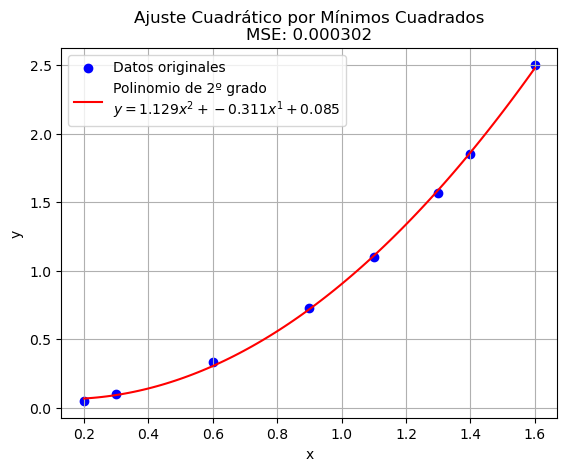

In [130]:
ajuste_polinomio(xs2, ys2, 2, 'Cuadrático')

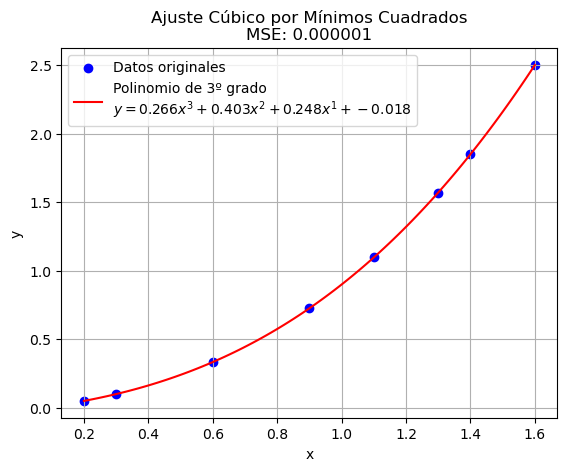

In [131]:
ajuste_polinomio(xs2, ys2, 3, 'Cúbico')

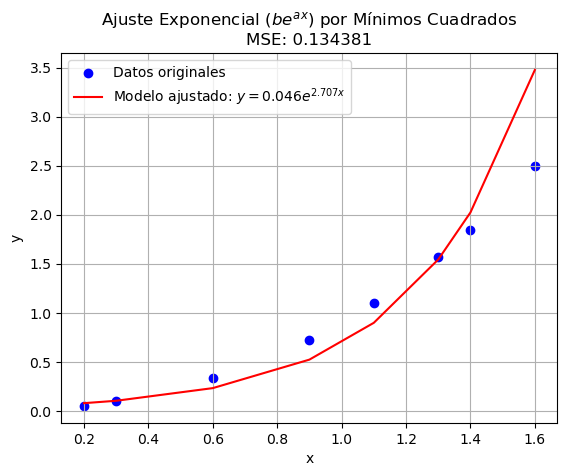

In [132]:
ajuste_exponencial(xs2, ys2)

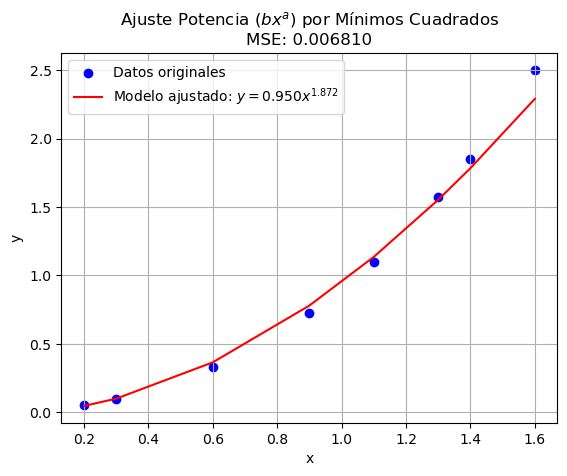

In [133]:
ajuste_potencia(xs2, ys2)

> Podemos concluir que el ajuste **cúbico** es prácticamente perfecto para el conjunto de datos datos, dado que su MSE es cero.

# Ejercicio 3

**La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias 
computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de 
la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique 
estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos.** 

In [137]:
puntuacion_act = np.array([28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 
              29, 28, 27, 29, 21, 28, 28, 26, 30, 24])
promedio_puntos = np.array([3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 
              3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81])

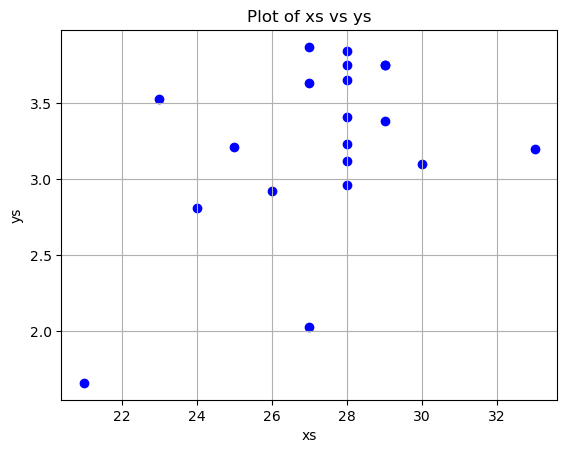

In [138]:
puntos(puntuacion_act, promedio_puntos)

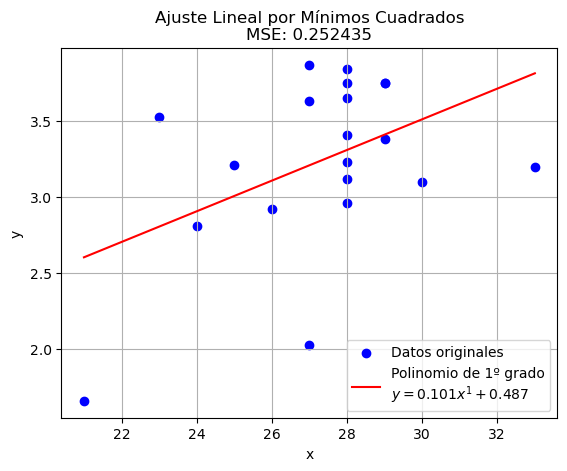

In [139]:
ajuste_polinomio(puntuacion_act, promedio_puntos, 1, 'Lineal')

# Ejercicio 4

**El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las 
características comparativas de supervivencia durante un choque de automóviles de diferentes clases. 
Encuentre la recta por mínimos cuadrados que aproxima estos datos.**

In [142]:
peso_promedio = np.array([4800, 3700, 3400, 2800, 1900]) # lb
porcentaje_presentacion = np.array([3.1, 4.0, 5.2, 6.4, 9.6]) # %

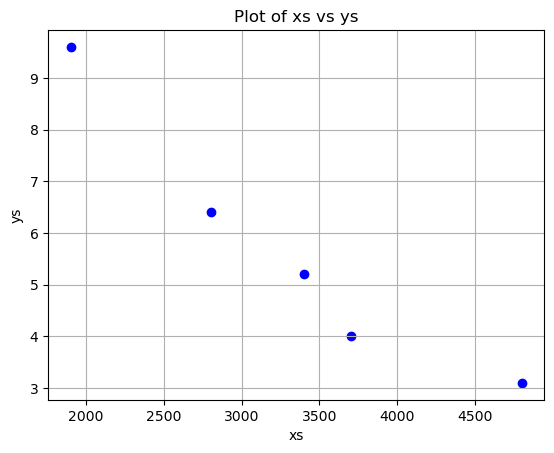

In [143]:
puntos(peso_promedio, porcentaje_presentacion)

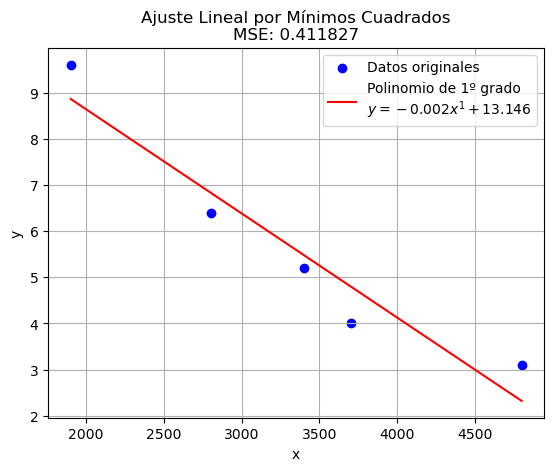

In [144]:
ajuste_polinomio(peso_promedio, porcentaje_presentacion, 1, 'Lineal')

**GitHub:** [Tarea8 - @mateobtw18](https://github.com/mateobtw18/Tarea_8)